In [ ]:
# Vincular con cuenta de Gmail para poder sacar la base de datos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importaciones
import random, os, shutil
import cv2
import numpy as np
import PIL

# **Descomprimimos la base de datos (unzip)**

In [ ]:
# La base de datos viene en Zip, asi como cada una de las clases, se requiere descomprimir
from zipfile import ZipFile
cont = 0
for i in range(1,21):
  if i < 10 and i != 5 and i != 6:
    file_name = '/content/drive/My Drive/Colab Notebooks/Ai Lab School/SESION 5/Terravic_Facial_IR_Database/Copia de face0{}.zip'.format(i)
  elif i >= 10:
    file_name = '/content/drive/My Drive/Colab Notebooks/Ai Lab School/SESION 5/Terravic_Facial_IR_Database/Copia de face{}.zip'.format(i)
  with ZipFile(file_name, 'r') as zip: 
    zip.extractall('Terravic_Original') 
# Los archivos se deben encontrar en la carpeta del lado izquierdo

# **Renombramos las clases de la base de datos**

Esta operación es importante para poder manejar con mayor facilidad los nombres de las carpetas que contienen las imágenes de cada individuo, ya que se debe considerar que las colecciones 5 y 6 están dañadas y no es posible acceder a ellas.

In [ ]:
import os

for i in range(1,21):
  if i >= 7 and i <= 9:
    os.rename('Terravic_Original/face0{}'.format(i), 'Terravic_Original/face0{}'.format(i - 2))
  elif i >= 10 and i <= 11:
    os.rename('Terravic_Original/face{}'.format(i), 'Terravic_Original/face0{}'.format(i - 2))
  elif i >= 12:
    os.rename('Terravic_Original/face{}'.format(i), 'Terravic_Original/face{}'.format(i - 2))

# **Construcción de los conjuntos de entrenamiento, validación y prueba**

**Ordenamos la base de datos aleatoriamente**

In [ ]:
os.mkdir('Terravic_Shuffled')

In [ ]:
# Creación de carpetas "Person" en la nueva carpeta
for i in range(1,19):
  if i < 10: 
    dest_train = 'Terravic_Shuffled/person0{}/'.format(i)
  elif i >= 10:
    dest_train = 'Terravic_Shuffled/person{}/'.format(i)
  os.mkdir(dest_train)

# Iterar en la base de datos original, procesar carpeta por carpeta.
for index_class in range(1,19): 
  sample = 0
  if index_class < 10: 
    class_path = 'Terravic_Original/face0{}/'.format(index_class)
  elif index_class >= 10:
    class_path = 'Terravic_Original/face{}/'.format(index_class)

  # Extracción de las imágenes correspondientes a cada individuo y ordenados
  lst = sorted(os.listdir(class_path))

  # Organizar las imagenes de forma aleatoria
  random.shuffle(lst)

  # Cargar las imagenes aleatorias en la nueva carpeta 
  for file_name in lst:
    img_person = cv2.imread(class_path + file_name)
    if index_class < 10:
      if sample < 10:                                                     
        cv2.imwrite('Terravic_Shuffled/person0{}/'.format(index_class) + '000{}.jpg'.format(sample), img_person)
      elif sample >= 10 and sample < 100:
        cv2.imwrite('Terravic_Shuffled/person0{}/'.format(index_class) + '00{}.jpg'.format(sample), img_person)
      elif sample >= 100 and sample < 1000:
        cv2.imwrite('Terravic_Shuffled/person0{}/'.format(index_class) + '0{}.jpg'.format(sample), img_person)
      else:
        cv2.imwrite('Terravic_Shuffled/person0{}/'.format(index_class) + '{}.jpg'.format(sample), img_person)
      
      sample = sample + 1

    else:
      if sample < 10:
        cv2.imwrite('Terravic_Shuffled/person{}/'.format(index_class) + '000{}.jpg'.format(sample), img_person)
      elif sample >= 10 and sample < 100:
        cv2.imwrite('Terravic_Shuffled/person{}/'.format(index_class) + '00{}.jpg'.format(sample), img_person)
      elif sample >= 100 and sample < 1000:
        cv2.imwrite('Terravic_Shuffled/person{}/'.format(index_class) + '0{}.jpg'.format(sample), img_person)
      else:
        cv2.imwrite('Terravic_Shuffled/person{}/'.format(index_class) + '{}.jpg'.format(sample), img_person)
      
      sample = sample + 1

**Creación de las carpetas de entrenamiento, validación y prueba, con sus respectivas carpetas para cada individuo**

In [ ]:
datasets = ['train', 'validation', 'test']

for dataset_name in datasets:
  os.mkdir(dataset_name)
  for i in range(1, 19):
    if i < 10:
      dest_train = dataset_name+'/person0{}/'.format(i)
    elif i >= 10:
      dest_train = dataset_name+'/person{}/'.format(i)
    os.mkdir(dest_train)

**Asignación de imágenes a cada conjunto**

In [ ]:
datasets = ['train', 'validation', 'test']
for dataset_name in datasets:
  for i in range(1, 19):
    if i < 10:
      src_path = 'Terravic_Shuffled/person0{}/'.format(i)
      dest_path = dataset_name+'/person0{}/'.format(i)
    else:
      src_path = 'Terravic_Shuffled/person{}/'.format(i)
      dest_path = dataset_name+'/person{}/'.format(i)

    lst = sorted(os.listdir(src_path))

    if dataset_name == 'train':
      cont = 0
      limit = 127
    elif dataset_name == 'validation': #127 + 50 + 50 = 227
      cont = 127
      limit = 177
    else:
      cont = 177
      limit = len(lst)
      
    for file_name in lst:
      if cont < limit:
        img_original = cv2.imread(src_path + file_name)
        if cont < 10:
            cv2.imwrite(dest_path + '000{}.jpg'.format(cont), img_original)
        elif cont >= 10 and cont < 100:
            cv2.imwrite(dest_path + '00{}.jpg'.format(cont), img_original)
        elif cont >= 100 and cont < 1000: 
            cv2.imwrite(dest_path + '0{}.jpg'.format(cont), img_original)
        else: 
            cv2.imwrite(dest_path + '{}.jpg'.format(cont), img_original)
            
        cont = cont + 1

In [ ]:
#Comprobación
import os
for i in range(1,19):
  if i < 10:
    print('total  images in train/person0{}:'.format(i), len(os.listdir('train/person0{}/'.format(i))))
  else:
    print('total  images in train/person{}:'.format(i), len(os.listdir('train/person{}/'.format(i))))

total  images in train/person01: 127
total  images in train/person02: 127
total  images in train/person03: 127
total  images in train/person04: 127
total  images in train/person05: 127
total  images in train/person06: 127
total  images in train/person07: 127
total  images in train/person08: 127
total  images in train/person09: 127
total  images in train/person10: 127
total  images in train/person11: 127
total  images in train/person12: 127
total  images in train/person13: 127
total  images in train/person14: 127
total  images in train/person15: 127
total  images in train/person16: 127
total  images in train/person17: 127
total  images in train/person18: 127


In [ ]:
#Comprobación
import os
for i in range(1,19):
  if i < 10:
    print('total  images in validation/person0{}:'.format(i), len(os.listdir('validation/person0{}/'.format(i))))
  else:
    print('total  images in validation/person{}:'.format(i), len(os.listdir('validation/person{}/'.format(i))))

total  images in validation/person01: 50
total  images in validation/person02: 50
total  images in validation/person03: 50
total  images in validation/person04: 50
total  images in validation/person05: 50
total  images in validation/person06: 50
total  images in validation/person07: 50
total  images in validation/person08: 50
total  images in validation/person09: 50
total  images in validation/person10: 50
total  images in validation/person11: 50
total  images in validation/person12: 50
total  images in validation/person13: 50
total  images in validation/person14: 50
total  images in validation/person15: 50
total  images in validation/person16: 50
total  images in validation/person17: 50
total  images in validation/person18: 50


In [ ]:
#Comprobación
import os
for i in range(1,19):
  if i < 10:
    print('total  images in test/person0{}:'.format(i), len(os.listdir('test/person0{}/'.format(i))))
  else:
    print('total  images in test/person{}:'.format(i), len(os.listdir('test/person{}/'.format(i))))

total  images in test/person01: 50
total  images in test/person02: 443
total  images in test/person03: 415
total  images in test/person04: 310
total  images in test/person05: 1120
total  images in test/person06: 680
total  images in test/person07: 940
total  images in test/person08: 106
total  images in test/person09: 257
total  images in test/person10: 2002
total  images in test/person11: 1240
total  images in test/person12: 1305
total  images in test/person13: 948
total  images in test/person14: 1434
total  images in test/person15: 2455
total  images in test/person16: 2038
total  images in test/person17: 2362
total  images in test/person18: 1493


# **Sistema de reconocimiento facial**

**Referenciamos los conjuntos de entrenamiento, validación y prueba**



In [ ]:
train_dir = os.path.join('train')
validation_dir = os.path.join('validation')
test_dir = os.path.join('test')

**Carga de la arquitectura VGG16**

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(100, 100, 3)) # input_shape = (largo, ancho, canales) 72, 96

conv_base.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
______________________________________________________________

**Congelamos y descongelamos ciertas capas (Fine-tuning)**

In [ ]:
for layer in conv_base.layers:
    if layer.name[:6] == 'block5': 
      layer.trainable = True
    else:
      layer.trainable = False

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

# **Definición de la arquitectura (incluyendo el módulo de transfer learning)**

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(conv_base)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization()) # Normaliza los pesos para ayudar el entrnamiento del modelo  
model.add(layers.Flatten())
model.add(layers.Dense(18, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 512)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 1, 512)         2048      
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 18)                9234      
Total params: 14,725,970
Trainable params: 7,089,682
Non-trainable params: 7,636,288
_________________________________________________________________


# **Compilación**

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),   # Learning Rate - Cambio en los pesos, con valor pequeño, se modera el cambio de los pesos
              metrics=['acc']) #'acc' -> accuracy -> precisión

# **Definición de los generadores**

In [ ]:
# Using ImageDataGenerator to read images from directories
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# No es viable utilizar el aumentador de datos en este caso
# Normalizar las imagenes
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # Target directory
        target_size=(100, 100), # All images are resized from 240x320 to 100x100
        batch_size= 9, 
        color_mode='rgb',
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(100, 100),
        batch_size=1,
        color_mode='rgb',
        class_mode='categorical')

Found 2286 images belonging to 18 classes.
Found 900 images belonging to 18 classes.


# **Entrenamiento**

In [ ]:
#Training and validation stages
history = model.fit(
      train_generator,
      steps_per_epoch=254, #70
      epochs= 10,
      validation_data=validation_generator,
      validation_steps=900)

Epoch 1/10
254/254 [==============================] - 44s 48ms/step - loss: 0.1841 - acc: 0.9576 - val_loss: 0.0060 - val_acc: 1.0000
Epoch 2/10
254/254 [==============================] - 12s 47ms/step - loss: 0.0020 - acc: 0.9996 - val_loss: 2.0161e-04 - val_acc: 1.0000
Epoch 3/10
254/254 [==============================] - 12s 47ms/step - loss: 6.3581e-04 - acc: 1.0000 - val_loss: 7.4888e-05 - val_acc: 1.0000
Epoch 4/10
254/254 [==============================] - 12s 48ms/step - loss: 3.5450e-04 - acc: 1.0000 - val_loss: 1.4178e-04 - val_acc: 1.0000
Epoch 5/10
254/254 [==============================] - 12s 48ms/step - loss: 2.4074e-04 - acc: 1.0000 - val_loss: 8.3417e-07 - val_acc: 1.0000
Epoch 6/10
254/254 [==============================] - 12s 47ms/step - loss: 1.7237e-04 - acc: 1.0000 - val_loss: 3.3617e-07 - val_acc: 1.0000
Epoch 7/10
254/254 [==============================] - 12s 48ms/step - loss: 1.8274e-05 - acc: 1.0000 - val_loss: 4.4372e-08 - val_acc: 1.0000
Epoch 8/10
254/254

# **Curvas de precisión y pérdida**

Mejor época (exactitud)  1
Mejor época (pérdida)  10


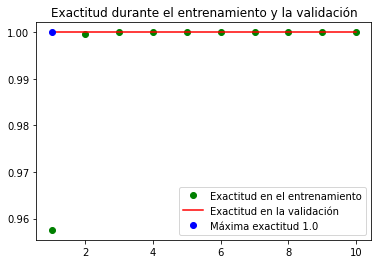

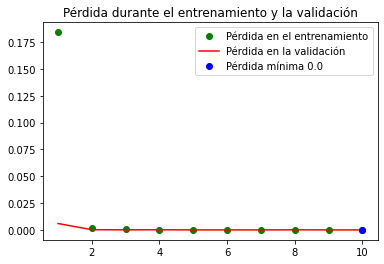

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
max_val_acc = max(val_acc)
max_val_acc_epoch= val_acc.index(max(val_acc)) + 1
loss = history.history['loss']
val_loss = history.history['val_loss']
min_val_loss = min(val_loss)
min_val_loss_epoch= val_loss.index(min(val_loss)) + 1

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'go', label='Exactitud en el entrenamiento')
plt.plot(epochs, val_acc, 'r', label='Exactitud en la validación')
plt.plot(max_val_acc_epoch, max_val_acc, 'bo', label='Máxima exactitud {}'.format(max_val_acc))
plt.title('Exactitud durante el entrenamiento y la validación')
plt.legend()
print('Mejor época (exactitud) ', max_val_acc_epoch)

plt.figure()

plt.plot(epochs, loss, 'go', label='Pérdida en el entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida en la validación')
plt.plot(min_val_loss_epoch, min_val_loss, 'bo', label='Pérdida mínima {}'.format(min_val_loss))
plt.title('Pérdida durante el entrenamiento y la validación')
plt.legend()
print('Mejor época (pérdida) ', min_val_loss_epoch)

plt.show()

# **Re-entrenamiento del modelo**
Mismas caracteristicas, pero en lugar de los datos de validacion, se usan los de prueba.

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(conv_base)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(18, activation='softmax'))

from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
#Training and validation stages
history = model.fit(
      train_generator,
      steps_per_epoch=254, #70
      epochs= 9)

Epoch 1/9
254/254 [==============================] - 8s 27ms/step - loss: 0.0611 - acc: 0.9873
Epoch 2/9
254/254 [==============================] - 7s 26ms/step - loss: 1.4647e-04 - acc: 1.0000
Epoch 3/9
254/254 [==============================] - 7s 26ms/step - loss: 1.0001e-05 - acc: 1.0000
Epoch 4/9
254/254 [==============================] - 7s 27ms/step - loss: 3.0511e-06 - acc: 1.0000
Epoch 5/9
254/254 [==============================] - 7s 27ms/step - loss: 6.4045e-06 - acc: 1.0000
Epoch 6/9
254/254 [==============================] - 7s 27ms/step - loss: 8.2342e-07 - acc: 1.0000
Epoch 7/9
254/254 [==============================] - 7s 27ms/step - loss: 3.6878e-07 - acc: 1.0000
Epoch 8/9
254/254 [==============================] - 7s 27ms/step - loss: 2.7951e-07 - acc: 1.0000
Epoch 9/9
254/254 [==============================] - 7s 27ms/step - loss: 8.8442e-08 - acc: 1.0000


In [ ]:
#Guardamos el modelo
model.save('/content/drive/My Drive/Colab Notebooks/Ai Lab School/SESION 5/face_recognition_model.h5')

In [ ]:
# Cargamos el modelo
from tensorflow.keras.models import load_model

model = load_model('/content/drive/My Drive/Colab Notebooks/Ai Lab School/SESION 5/face_recognition_model.h5', compile = False) # Compile = False --> No volver a entrenar el modelo

# **Evaluación del modelo final**

In [ ]:
#Test stage
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(100, 100),
        batch_size=1,
        color_mode='rgb',
        class_mode='categorical')

Found 19598 images belonging to 18 classes.


In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps=19598)
print('Recognition rate: ', test_acc)

19598/19598 [==============================] - 129s 7ms/step - loss: 1.0024e-08 - acc: 1.0000
Recognition rate:  1.0


# **Predicciones**

In [ ]:
# Hacer predicciones en una imagen en particular

# Utilizar librerias que permitan manipular imagenes, alternativa a OpenCV
from PIL import Image #PILLOW

width = 100
height = 100
image_face = Image.open('test/person06/0184.jpg')    # Cargar imagen
image_face = image_face.resize((width, height), Image.ANTIALIAS)   # Redimensionar la imagen, Antialias --> Reduce el ruido
# La imagen necesita ser un tensor, primero a np array;
image_face = np.array(image_face)  # Transformar la imagen a arreglo, con caracteristicas de Numpy Array
image_face = image_face / 255.0    # Normalizar la imagen    Tensor -> (100,100)
image_face = np.expand_dims(image_face, axis = 0)  # Agregar un eje      TENSOR -> (1, 100, 100)
#image_face = np.expand_dims(image_face, axis = -1) # Agregar otro eje    TENSOR -> (1, 100, 100, 1)
image_face = np.stack((image_face[:,:,:,0], image_face[:,:,:,0], image_face[:,:,:,0]), axis=3) #Agregar 3 canales al ultimo eje    TENSOR -> (1, 100, 100, 3)
print(image_face.shape)   # Mostrar dimensiones de la imagen
prediction = model.predict(image_face)
print('La imagen pertenece a la persona', np.argmax(prediction)+1)

(1, 100, 100, 3)
La imagen pertenece a la persona 6


In [ ]:
prediction # Observar los valores

array([[4.77983278e-11, 7.22386734e-11, 1.02917963e-09, 6.09360409e-11,
        2.82348415e-11, 1.00000000e+00, 1.51534965e-10, 9.89474544e-11,
        4.23880236e-11, 1.73140918e-10, 1.02689086e-10, 1.99370645e-10,
        1.99524234e-11, 1.24111457e-10, 1.46221108e-11, 6.09136075e-11,
        1.94005909e-10, 2.30147360e-11]], dtype=float32)

In [ ]:
predictions = []
labels = []
for individual in range(1,19):     # Iterar en las 18 clases
  if individual < 10:              # Separacion para la numeracion (0,9) y (10,;)
    person = 'person0{}/'.format(individual)
  elif individual >= 10:
    person = 'person{}/'.format(individual)
  for index in range(177, len(os.listdir('test/'+person))):    # Revisar en el conjunto de prueba (177 - ...)
   # Lo mismo de 2 celdas anteriores
    width = 100  
    height = 100
    if index < 1000:
      image_face = Image.open('test/'+person+'0{}.jpg'.format(index))
    else:
      image_face = Image.open('test/'+person+'{}.jpg'.format(index))
    image_face = image_face.resize((width, height), Image.ANTIALIAS)
    image_face = np.array(image_face)
    image_face = image_face / 255.0
    image_face = np.expand_dims(image_face, axis = 0)
    image_face = np.expand_dims(image_face, axis = -1)
    image_face = np.stack((image_face[:,:,:,0], image_face[:,:,:,0], image_face[:,:,:,0]), axis=3)
    prediction = model.predict(image_face)
    predictions.append(np.argmax(prediction)+1)
    labels.append(individual) # Agregar a una lista la clase a la que pertenece a cada imagen

# **Evaluación del desempeño mediante matriz de confusión y F1**

**Matriz de confusión**

In [ ]:
from sklearn.metrics import confusion_matrix
mcm = confusion_matrix(labels, predictions)
print(mcm)

[[ 266    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0  238    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0  133    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0  943    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0  503    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0  763    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0   80    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0 1825    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0 1063    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0 1128    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0    0  771    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0    0    0 1257    

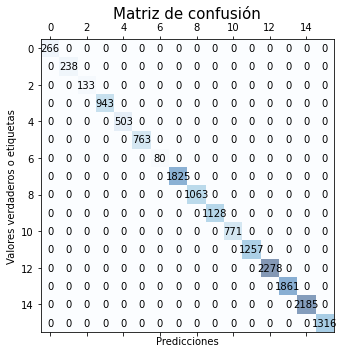

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(mcm, cmap=plt.cm.Blues, alpha=0.5)
for i in range(mcm.shape[0]):
  for j in range(mcm.shape[1]):
      ax.text(x=j, y=i, s=mcm[i, j], va='center', ha='center')

plt.title("Matriz de confusión",fontsize=15)
#plt.title('f model: T= %d' % (t))
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos o etiquetas')

plt.tight_layout()
plt.show()

**Calculamos la métrica F1**

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

print('Precision: %.7f' % precision_score(y_true=labels, y_pred=predictions, average='macro'))
print('Recall: %.7f' % recall_score(y_true=labels, y_pred=predictions, average='macro'))
print('F1: %.7f' % f1_score(y_true=labels, y_pred=predictions, average='macro'))

Precision: 1.0000000
Recall: 1.0000000
F1: 1.0000000
